In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast

In [3]:
from pathlib import Path  
path_to_data = Path.cwd() / "data"
file = "Default.csv"
default_df = pd.read_csv(path_to_data/file)

In [9]:
# let's analyze the data 
default_df.columns.tolist()

['default', 'student', 'balance', 'income']

In [12]:
default_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [15]:
default_df["default"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [24]:
# Just for readability, and don't have to repeat filtering for every plot 
default_y = default_df["default"] == "Yes"
default_n = default_df["default"] == "No"
print(default_n)

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: default, Length: 10000, dtype: bool


In [23]:
# This is a bit overkill, but at companies you may want to do defensive coding
# Someone may run the same code on a different dataset with no non-defaulters
# Downsample the number of "No" samples so the plot isn't overwhelmend by blue
# points. 
if default_n.any():
    # Sample 10% of "No" points
    no_scatter_idx = default_df.loc[default_n].sample(frac=0.10, random_state=0).index
else: 
    no_scatter_idx = default_df.index[default_n]

In [31]:
## .loc vs .iloc 
# Type is "pandas.core.indexes.base.Index", which are labels 
type(no_scatter_idx)
# For example 
df = pd.DataFrame({"a": [10, 20, 30]}, index=[101, 102, 103]) 
print(df.index)
print(df.loc[101])
print(df.iloc[0])

Index([101, 102, 103], dtype='int64')
a    10
Name: 101, dtype: int64
a    10
Name: 101, dtype: int64


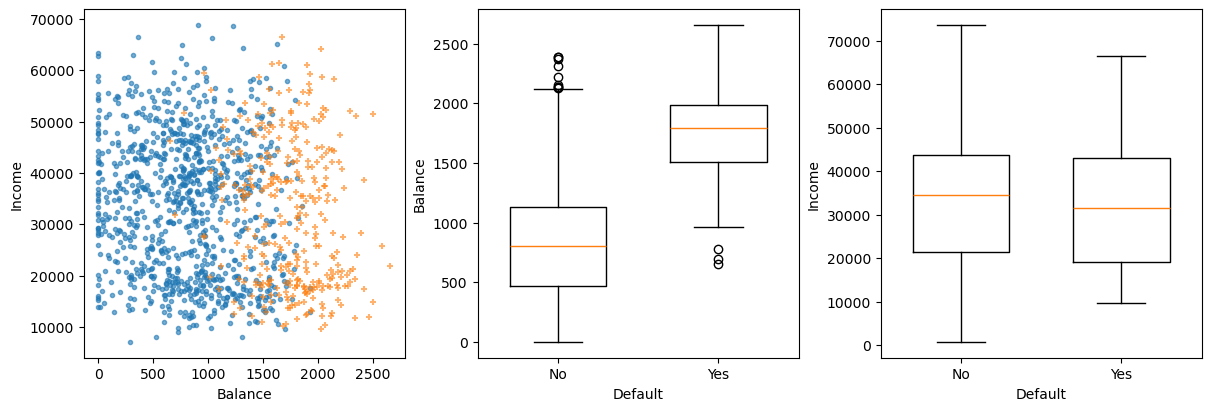

In [63]:
import matplotlib.pyplot as plt 
# Use constrained layout so ylabels for subplots don't move into other subplot
# space. 
fig, ax = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True) 
ax[0].scatter(default_df.loc[no_scatter_idx, "balance"],
              default_df.loc[no_scatter_idx, "income"],
              s=9, alpha=0.6, label="No Default")
ax[0].scatter(default_df.loc[default_y, "balance"],
              default_df.loc[default_y, "income"],
              s=25, alpha=0.6, marker='+', label="No Default")
ax[0].set_xlabel("Balance")
ax[0].set_ylabel("Income")

ax[1].boxplot([default_df.loc[default_n, "balance"], 
               default_df.loc[default_y, "balance"]],
               tick_labels=["No", "Yes"], widths=0.6, showfliers=True)
ax[1].set_xlabel("Default")
ax[1].set_ylabel("Balance")

ax[2].boxplot([default_df.loc[default_n, "income"], 
               default_df.loc[default_y, "income"]],
               tick_labels=["No", "Yes"], widths=0.6, showfliers=True)
ax[2].set_xlabel("Default")
ax[2].set_ylabel("Income")
plt.show()


**Figure 4.1.** The Default data set. Left: The annual incomes and monthly
credit card balances of a number of individuals. The individuals who defaulted on their credit card payments are shown in orange, and those who did not are shown in blue. Center: Boxplots of balance as a function of default status. Right: Boxplots of income as a function of default status